In [20]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature

n = pypsa.Network()
n.import_from_netcdf(path="../FYP-TZ-APG-Hydrogen-Integration/Network Saves/v1.nc")

INFO:pypsa.network.io:New version 1.0.2 available! (Current: 0.35.2)
INFO:pypsa.network.io:Imported network '' has buses, carriers, generators, global_constraints, links, loads, storage_units


In [21]:
n.loads

,bus,carrier,type,p_set,q_set,sign,active
Load,,,,,,,
IDNSM,IDNSM,,,0.0,0.0,-1.0,True
IDNJW,IDNJW,,,0.0,0.0,-1.0,True
IDNNU,IDNNU,,,0.0,0.0,-1.0,True
IDNKA,IDNKA,,,0.0,0.0,-1.0,True
IDNSL,IDNSL,,,0.0,0.0,-1.0,True
IDNML,IDNML,,,0.0,0.0,-1.0,True
IDNPP,IDNPP,,,0.0,0.0,-1.0,True
MYSPE,MYSPE,,,0.0,0.0,-1.0,True
MYSSK,MYSSK,,,0.0,0.0,-1.0,True


In [22]:
n.optimize(n.snapshots[::24])

INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 9/9 [00:00<00:00, 19.67it/s]
INFO:linopy.io: Writing time: 4.82s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 290851 primals, 957974 duals
Objective: 1.38e+10
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Link-fix-p-lower, Link-fix-p-upper, Link-ext-p-lower, Link-ext-p-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were 

('ok', 'optimal')

In [23]:
# Make sure the network is optimized
# n.optimize() 

# Sum generator dispatch per bus
bus_generation = n.generators_t.p.groupby(n.generators.bus, axis=1).sum()

print(bus_generation.head())  # MW at each snapshot per bus


bus                              BRNXX         IDNJW        IDNKA       IDNML  \
period timestep                                                                 
2023   2023-01-01 00:00:00  579.285714  27588.652992  2115.320010  183.825875   
       2023-01-01 02:00:00  365.000000  22609.396969  1550.214015  183.309490   
       2023-01-01 04:00:00  401.500000  22976.377772  1575.376065  186.284849   
       2023-01-01 06:00:00  401.500000  23163.984251  1588.239310  187.805900   
       2023-01-01 08:00:00  401.500000  23553.928434  1614.975845  190.967438   

bus                              IDNNU       IDNPP        IDNSL        IDNSM  \
period timestep                                                                
2023   2023-01-01 00:00:00  261.848750  225.756959  1660.918213  9506.584241   
       2023-01-01 02:00:00  434.189267  225.122786  1656.252534  5502.741269   
       2023-01-01 04:00:00  441.236740  228.776831  1683.135732  5592.058132   
       2023-01-01 06:00:00  444.

C:\Users\User\AppData\Local\Temp\ipykernel_27576\1009181701.py:5: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



In [24]:
# n.statistics.capex()
n.statistics.energy_balance()

period                                          2023          2035
component   carrier       bus_carrier                             
Generator   Backstop      Transmission           NaN           NaN
            Bioenergy     Transmission           NaN           NaN
            Biomass       Transmission  9.024685e+06  1.201157e+07
            Coal          Transmission  1.603578e+08  3.189124e+08
            Gas           Transmission  7.093383e+07  3.486034e+08
            Geothermal    Transmission  1.766454e+07  1.509516e+07
            Hydro         Transmission  2.537695e+08  3.091835e+08
            Offshore Wind Transmission  9.411772e+06  9.411147e+06
            Oil           Transmission           NaN  1.702755e+04
            Onshore Wind  Transmission  2.778390e+07  2.770336e+07
            Solar         Transmission  1.362401e+07  1.360622e+07
Link        Hydrogen      Hydrogen      3.211650e+06  3.194100e+06
                          Transmission -4.588071e+06 -4.563000e+06
            Transmission  Transmission -2.800326e+06 -2.377515e+06
Load        -             Transmission -5.527006e+08 -1.035270e+09
            Hydrogen      Hydrogen     -3.211650e+06 -3.194100e+06
StorageUnit Battery       Transmission -2.481129e+06 -1.233340e+07

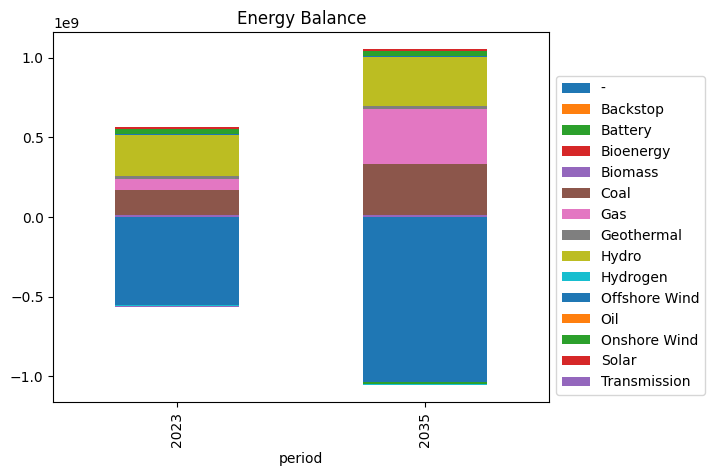

In [25]:
fig, ax = plt.subplots()

# Group by carrier and sum across components/bus_carrier
n.statistics.energy_balance().groupby("carrier").sum().T.plot(
    kind="bar", stacked=True, ax=ax, title="Energy Balance"
)

# Adjust legend
ax.legend(bbox_to_anchor=(1, 0), loc="lower left", title=None, ncol=1)
plt.show()